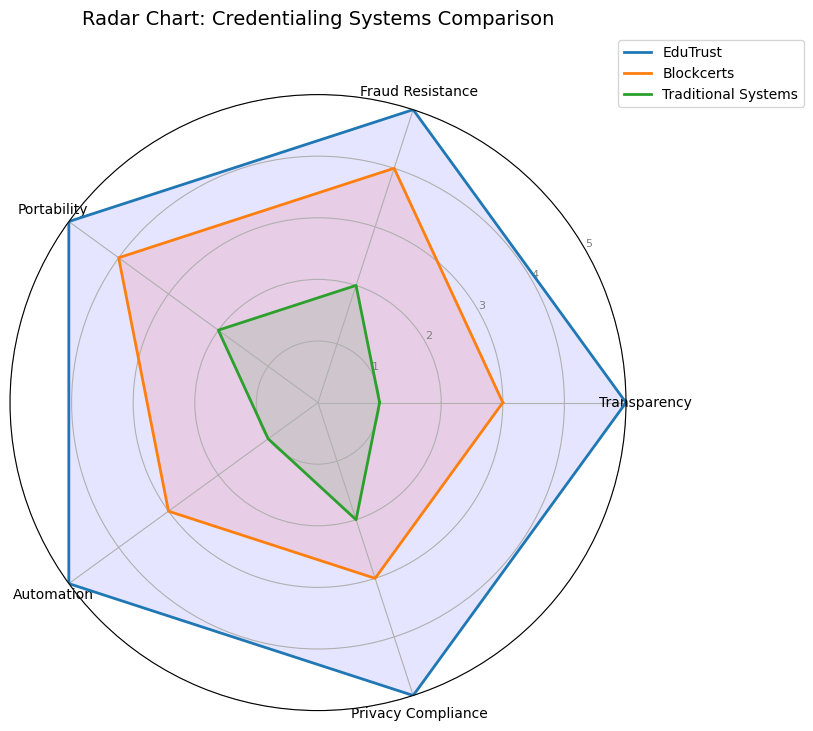

In [1]:
# Radar Chart: EduTrust vs Blockcerts vs Traditional Credentialing

import matplotlib.pyplot as plt
import numpy as np

# Define the radar chart categories
categories = ['Transparency', 'Fraud Resistance', 'Portability', 'Automation', 'Privacy Compliance']
N = len(categories)

# Define performance scores for each system (scale 1–5)
edu_trust = [5, 5, 5, 5, 5]
blockcerts = [3, 4, 4, 3, 3]
tradfi = [1, 2, 2, 1, 2]

# Repeat first value to close the radar chart loop
edu_trust += edu_trust[:1]
blockcerts += blockcerts[:1]
tradfi += tradfi[:1]

# Compute angle for each axis
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

# Set up the figure
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Set category labels
plt.xticks(angles[:-1], categories)

# Set y-labels and limits
ax.set_rlabel_position(30)
plt.yticks([1, 2, 3, 4, 5], ["1", "2", "3", "4", "5"], color="grey", size=8)
plt.ylim(0, 5)

# Plot each system
ax.plot(angles, edu_trust, linewidth=2, linestyle='solid', label="EduTrust")
ax.fill(angles, edu_trust, 'blue', alpha=0.1)

ax.plot(angles, blockcerts, linewidth=2, linestyle='solid', label="Blockcerts")
ax.fill(angles, blockcerts, 'red', alpha=0.1)

ax.plot(angles, tradfi, linewidth=2, linestyle='solid', label="Traditional Systems")
ax.fill(angles, tradfi, 'green', alpha=0.1)

# Add title and legend
plt.title("Radar Chart: Credentialing Systems Comparison", size=14, y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

# Display plot
plt.show()


In [1]:
# SHA-256 hashing of academic credentials (simulated string input)

import hashlib

# Sample student credential
credential_data = "John Doe, MSc Finance, Warwick, 2025"

# Convert to SHA-256 hash
hashed_credential = hashlib.sha256(credential_data.encode()).hexdigest()

print("SHA-256 Credential Hash:")
print(hashed_credential)


SHA-256 Credential Hash:
752ff89140cc1ce82fc525d87b042bcf9e6090791311697cd2c12d6d8dbed733


In [2]:
# Simulate Merkle Tree construction (basic logic for 4 credentials)

def sha256(data):
    return hashlib.sha256(data.encode()).hexdigest()

# Sample credential records
credentials = [
    "Alice, BSc Computer Science, 2023",
    "Bob, MBA Business, 2024",
    "Charlie, PhD Economics, 2022",
    "Dana, MSc AI, 2025"
]

# Hash each credential (leaf nodes)
leaves = [sha256(c) for c in credentials]

# Combine leaves into parent hashes
def merkle_pairwise(leaves):
    while len(leaves) > 1:
        temp = []
        for i in range(0, len(leaves), 2):
            left = leaves[i]
            right = leaves[i + 1] if i + 1 < len(leaves) else leaves[i]
            temp.append(sha256(left + right))
        leaves = temp
    return leaves[0]

merkle_root = merkle_pairwise(leaves)

print("\nMerkle Root of Credential Batch:")
print(merkle_root)



Merkle Root of Credential Batch:
b9c39935ae6d2354c7ab5e452e668c99ba02fc95891b97444e48b925e3c89620


In [3]:
# Simulate DID resolution logic (mapping student ID to blockchain credential link)

did_registry = {
    "did:edutrust:alice123": "ipfs://QmXyzCredentialHash1",
    "did:edutrust:bob456": "ipfs://QmXyzCredentialHash2"
}

# Simulate lookup
query_did = "did:edutrust:bob456"
credential_uri = did_registry.get(query_did, "DID Not Found")

print("\nResolved Credential URI for", query_did)
print(credential_uri)



Resolved Credential URI for did:edutrust:bob456
ipfs://QmXyzCredentialHash2


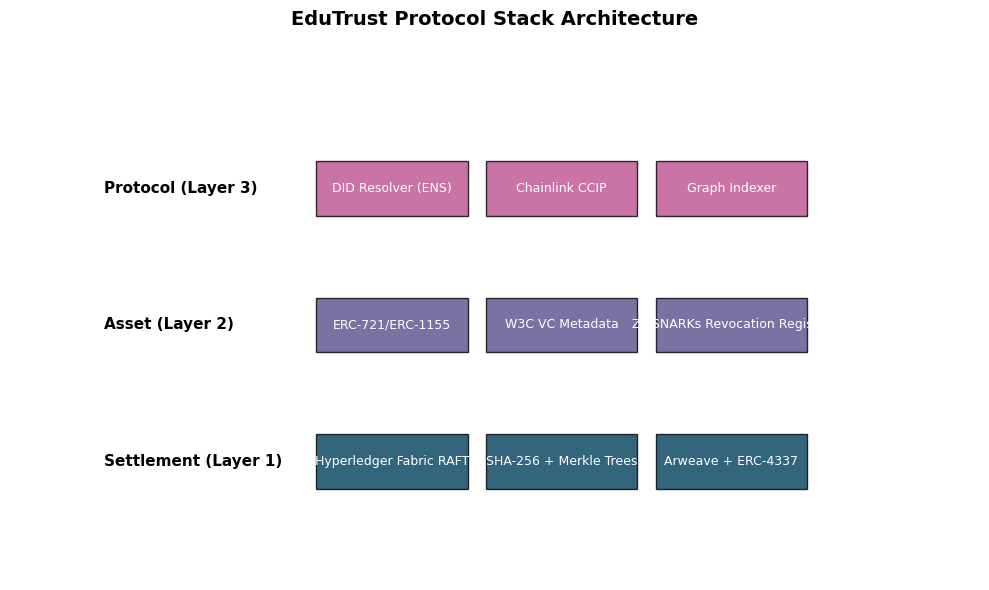

In [6]:
import matplotlib.pyplot as plt

# Define the three layers and their components
layers = {
    "Protocol (Layer 3)": ["DID Resolver (ENS)", "Chainlink CCIP", "Graph Indexer"],
    "Asset (Layer 2)": ["ERC-721/ERC-1155", "W3C VC Metadata", "ZK-SNARKs Revocation Registry"],
    "Settlement (Layer 1)": ["Hyperledger Fabric RAFT", "SHA-256 + Merkle Trees", "Arweave + ERC-4337"]
}

# Reverse the layers so Layer 1 is at the bottom
layer_names = list(layers.keys())[::-1]
colors = ['#003f5c', '#58508d', '#bc5090']  # Dark-themed gradient

fig, ax = plt.subplots(figsize=(10, 6))

# Settings
box_width = 2.5
box_height = 0.6
spacing_y = 1.5

# Plot boxes layer by layer
for i, layer in enumerate(layer_names):
    y = i * spacing_y
    components = layers[layer]
    total_width = len(components) * (box_width + 0.3)
    start_x = -total_width / 2 + (box_width / 2)

    # Draw components
    for j, comp in enumerate(components):
        x = start_x + j * (box_width + 0.3)
        rect = plt.Rectangle((x, y), box_width, box_height, color=colors[i], alpha=0.8, ec='black')
        ax.add_patch(rect)
        ax.text(x + box_width/2, y + box_height/2, comp, ha='center', va='center', color='white', fontsize=9)

    # Draw layer label to the left
    ax.text(start_x - 3.5, y + box_height/2, layer, ha='left', va='center', fontsize=11, fontweight='bold', color='black')

# Title and styling
plt.title("EduTrust Protocol Stack Architecture", fontsize=14, weight='bold')
ax.set_xlim(-8, 8)
ax.set_ylim(-1, 5)
ax.axis('off')

# Show plot
plt.tight_layout()
plt.show()


In [7]:
# Simulated NFT metadata (inspired by ERC-721 standard + VC metadata)
credential_token = {
    "token_id": "0x01A3",
    "student_did": "did:edutrust:alice123",
    "issuer": "University of Warwick",
    "degree": "MSc Finance",
    "year": 2025,
    "VC_metadata": {
        "@context": "https://www.w3.org/2018/credentials/v1",
        "type": ["VerifiableCredential", "UniversityDegreeCredential"],
        "credentialSubject": {
            "id": "did:edutrust:alice123",
            "degree": {
                "type": "MasterDegree",
                "name": "MSc Finance"
            }
        }
    }
}
# Simulate selective disclosure using a "privacy toggle"
def disclose_fields(token_data, fields):
    disclosed = {field: token_data.get(field) for field in fields}
    return disclosed

# Student chooses to only share degree type (not name or year)
private_view = disclose_fields(credential_token, ["degree"])
print("Disclosed Credential Info:")
print(private_view)
# Dictionary acting as a revocation registry
revoked_tokens = set()

def revoke_token(token_id):
    revoked_tokens.add(token_id)

def is_token_revoked(token_id):
    return token_id in revoked_tokens

# Revoke a token
revoke_token("0x01A3")

print("Token Revoked:", is_token_revoked("0x01A3"))  # Should return True


Disclosed Credential Info:
{'degree': 'MSc Finance'}
Token Revoked: True


In [ ]:
# EduTrust Tokenization & Privacy Simulation 

import json

# === 1. TOKEN METADATA STRUCTURE === #
credential_token = {
    "token_id": "0x01A3",
    "student_did": "did:edutrust:alice123",
    "issuer": "University of Warwick",
    "degree": "MSc Finance",
    "graduation_year": 2025,
    "VC_metadata": {
        "@context": "https://www.w3.org/2018/credentials/v1",
        "type": ["VerifiableCredential", "UniversityDegreeCredential"],
        "credentialSubject": {
            "id": "did:edutrust:alice123",
            "degree": {
                "type": "MasterDegree",
                "name": "MSc Finance",
                "field": "Finance"
            },
            "issuedBy": "University of Warwick"
        }
    }
}

print("🔗 EduTrust Token Metadata (ERC-721 + VC Compliant):\n")
print(json.dumps(credential_token, indent=4))


🔗 EduTrust Token Metadata (ERC-721 + VC Compliant):

{
    "token_id": "0x01A3",
    "student_did": "did:edutrust:alice123",
    "issuer": "University of Warwick",
    "degree": "MSc Finance",
    "graduation_year": 2025,
    "VC_metadata": {
        "@context": "https://www.w3.org/2018/credentials/v1",
        "type": [
            "VerifiableCredential",
            "UniversityDegreeCredential"
        ],
        "credentialSubject": {
            "id": "did:edutrust:alice123",
            "degree": {
                "type": "MasterDegree",
                "name": "MSc Finance",
                "field": "Finance"
            },
            "issuedBy": "University of Warwick"
        }
    }
}


In [22]:
# === 2. ZK-SNARK STYLE SELECTIVE DISCLOSURE === #
def disclose_fields(token_data, fields):
    print("\n Selective Disclosure Activated (ZK Simulation):")
    disclosed = {field: token_data.get(field, "Not Available") for field in fields}
    for k, v in disclosed.items():
        print(f"- {k}: {v}")
    return disclosed

# Example: Student only discloses their degree
zk_view = disclose_fields(credential_token, ["degree"])



 Selective Disclosure Activated (ZK Simulation):
- degree: MSc Finance


In [21]:
# === 3. REVOCATION REGISTRY LOGIC === #
revoked_tokens = set()

def revoke_token(token_id):
    revoked_tokens.add(token_id)
    print(f"\n Token {token_id} has been added to the Revocation Registry.")

def is_token_revoked(token_id):
    status = token_id in revoked_tokens
    status_msg = "❌ Revoked" if status else "✅ Active"
    print(f" Credential Status for {token_id}: {status_msg}")
    return status

# Revoke a sample token
revoke_token("0x01A3")
is_token_revoked("0x01A3")



 Token 0x01A3 has been added to the Revocation Registry.
 Credential Status for 0x01A3: ❌ Revoked


True


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
from graphviz import Digraph

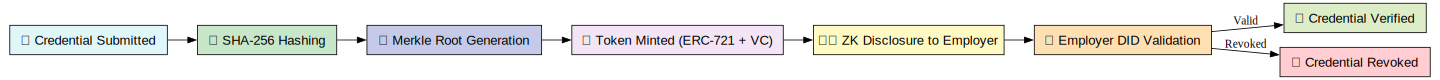

In [20]:
import os
import graphviz
from graphviz import Digraph

# Manually add Graphviz to PATH (only if needed)
os.environ["PATH"] += os.pathsep + r"C:\Program Files\Graphviz\bin"

# Initialize directed graph
g = Digraph("Credential Lifecycle Flow", format='png')
g.attr(rankdir='LR', size='20,8')
g.attr('node', shape='box', style='filled', fontname='Arial', fontsize='16')

# Nodes
g.node("A", "🎓 Credential Submitted", fillcolor="#e0f7fa")
g.node("B", "🔐 SHA-256 Hashing", fillcolor="#c8e6c9")
g.node("C", "🌲 Merkle Root Generation", fillcolor="#c5cae9")
g.node("D", "🧾 Token Minted (ERC-721 + VC)", fillcolor="#f3e5f5")
g.node("E", "🛡️ ZK Disclosure to Employer", fillcolor="#fff9c4")
g.node("F", "🏢 Employer DID Validation", fillcolor="#ffe0b2")
g.node("G1", "✅ Credential Verified", fillcolor="#dcedc8")
g.node("G2", "❌ Credential Revoked", fillcolor="#ffcdd2")

# Edges (Flow)
g.edge("A", "B")
g.edge("B", "C")
g.edge("C", "D")
g.edge("D", "E")
g.edge("E", "F")
g.edge("F", "G1", label="Valid")
g.edge("F", "G2", label="Revoked")

# Show inline
display(g)

In [23]:
# =========================
# EduTrust Credential Verification Simulation
# =========================

# 1. DID Registry Mapping
did_registry = {
    "did:edutrust:alice123": {
        "ipfs_uri": "ipfs://QmABC123CredentialHash",
        "revoked": False,
        "credential": {
            "name": "Alice Smith",
            "degree": "MSc Finance",
            "institution": "University of Warwick",
            "year": "2025",
            "gpa": "Distinction"
        }
    },
    "did:edutrust:bob456": {
        "ipfs_uri": "ipfs://QmXYZ987RevokedHash",
        "revoked": True,
        "credential": {
            "name": "Bob Taylor",
            "degree": "BSc Computer Science",
            "institution": "UCL",
            "year": "2024",
            "gpa": "Merit"
        }
    }
}

# 2. ZK Disclosure Function
def zk_disclose(did, fields_to_reveal):
    print("\n [ZK Disclosure Simulation]")
    if did not in did_registry:
        print(" DID not found in registry.")
        return

    entry = did_registry[did]

    print(f" IPFS Link: {entry['ipfs_uri']}")
    print(f" Revocation Status: {'❌ Revoked' if entry['revoked'] else '✅ Valid'}")

    # Selectively disclose only requested fields
    print("\n🔐 Disclosed Fields:")
    for field in fields_to_reveal:
        if field in entry['credential']:
            print(f"  - {field}: {entry['credential'][field]}")
        else:
            print(f"  - {field}: Not Available")

# 3. Full Disclosure Function
def full_disclosure(did):
    print("\n [Full Credential Verification]")
    if did not in did_registry:
        print(" DID not found.")
        return

    entry = did_registry[did]
    print(f" IPFS Link: {entry['ipfs_uri']}")
    print(f" Revocation Status: {'❌ Revoked' if entry['revoked'] else '✅ Valid'}")

    print("\n Full Credential Metadata:")
    for k, v in entry['credential'].items():
        print(f"  - {k}: {v}")

# =========================
# Simulated Test Cases
# =========================

print("=== ✅ Employer Verification Example 1 ===")
zk_disclose("did:edutrust:alice123", ["degree", "institution"])

print("\n=== ❌ Employer Verification Example 2 ===")
full_disclosure("did:edutrust:bob456")  # Should be revoked



=== ✅ Employer Verification Example 1 ===

 [ZK Disclosure Simulation]
 IPFS Link: ipfs://QmABC123CredentialHash
 Revocation Status: ✅ Valid

🔐 Disclosed Fields:
  - degree: MSc Finance
  - institution: University of Warwick

=== ❌ Employer Verification Example 2 ===

 [Full Credential Verification]
 IPFS Link: ipfs://QmXYZ987RevokedHash
 Revocation Status: ❌ Revoked

 Full Credential Metadata:
  - name: Bob Taylor
  - degree: BSc Computer Science
  - institution: UCL
  - year: 2024
  - gpa: Merit


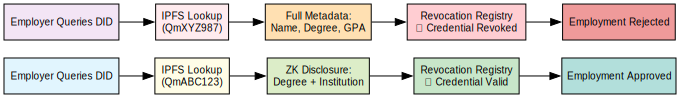

In [24]:
from graphviz import Digraph

# Initialize graph
g = Digraph("EmployerVerificationFlow", format='png')
g.attr(rankdir='LR', size='12,6')
g.attr('node', shape='box', style='filled', fontname='Arial', fontsize='10')

# ZK-Based Verification Path
g.node("A1", "Employer Queries DID", fillcolor="#e1f5fe")
g.node("B1", "IPFS Lookup\n(QmABC123)", fillcolor="#fffde7")
g.node("C1", "ZK Disclosure:\nDegree + Institution", fillcolor="#dcedc8")
g.node("D1", "Revocation Registry\n✅ Credential Valid", fillcolor="#c8e6c9")
g.node("E1", "Employment Approved", fillcolor="#b2dfdb")

# Full Disclosure Path
g.node("A2", "Employer Queries DID", fillcolor="#f3e5f5")
g.node("B2", "IPFS Lookup\n(QmXYZ987)", fillcolor="#ffebee")
g.node("C2", "Full Metadata:\nName, Degree, GPA", fillcolor="#ffe0b2")
g.node("D2", "Revocation Registry\n❌ Credential Revoked", fillcolor="#ffcdd2")
g.node("E2", "Employment Rejected", fillcolor="#ef9a9a")

# ZK path edges
g.edge("A1", "B1")
g.edge("B1", "C1")
g.edge("C1", "D1")
g.edge("D1", "E1")

# Full path edges
g.edge("A2", "B2")
g.edge("B2", "C2")
g.edge("C2", "D2")
g.edge("D2", "E2")

# Display the graph inline
display(g)


In [25]:
# ✅ EduTrust DAO Proposal Voting Simulation

from collections import defaultdict

# Sample accredited universities and voting weights (e.g., based on reputation or credentials issued)
voters = {
    "Oxford University": 3,
    "University of Warwick": 2,
    "UCL": 2,
    "Harvard": 4,
    "Stanford": 4
}

# Define a sample proposal
proposal = {
    "id": "UPG-2025-01",
    "title": "Integrate Zero-Knowledge KYC Compliance for EU Region",
    "description": "This proposal upgrades EduTrust Layer 3 to include optional ZK-KYC plugin for EU credential flow.",
    "votes_for": 0,
    "votes_against": 0,
    "voters_participated": []
}

# Voting function
def cast_vote(university, vote):
    if university not in voters:
        print(f"❌ {university} is not an accredited DAO member.")
        return
    if university in proposal["voters_participated"]:
        print(f"⚠️ {university} has already voted.")
        return

    weight = voters[university]
    if vote.lower() == "for":
        proposal["votes_for"] += weight
        print(f"✅ {university} voted FOR the proposal with {weight} votes.")
    elif vote.lower() == "against":
        proposal["votes_against"] += weight
        print(f"❌ {university} voted AGAINST the proposal with {weight} votes.")
    else:
        print("Invalid vote. Use 'for' or 'against'.")

    proposal["voters_participated"].append(university)

# Simulate Voting
print(f"\n🗳️ Voting begins on Proposal {proposal['id']} - {proposal['title']}\n")

cast_vote("Oxford University", "for")
cast_vote("University of Warwick", "for")
cast_vote("UCL", "against")
cast_vote("Harvard", "for")
cast_vote("Stanford", "against")

# Final Tally
print("\n📊 Final Vote Tally:")
print(f"Votes For     : {proposal['votes_for']}")
print(f"Votes Against : {proposal['votes_against']}")

# Result Logic
required_majority = sum(voters.values()) * 0.6  # 60% supermajority needed
if proposal["votes_for"] >= required_majority:
    print("✅ Proposal PASSED: Protocol will be upgraded.")
else:
    print("❌ Proposal FAILED: Did not reach 60% majority.")



🗳️ Voting begins on Proposal UPG-2025-01 - Integrate Zero-Knowledge KYC Compliance for EU Region

✅ Oxford University voted FOR the proposal with 3 votes.
✅ University of Warwick voted FOR the proposal with 2 votes.
❌ UCL voted AGAINST the proposal with 2 votes.
✅ Harvard voted FOR the proposal with 4 votes.
❌ Stanford voted AGAINST the proposal with 4 votes.

📊 Final Vote Tally:
Votes For     : 9
Votes Against : 6
✅ Proposal PASSED: Protocol will be upgraded.


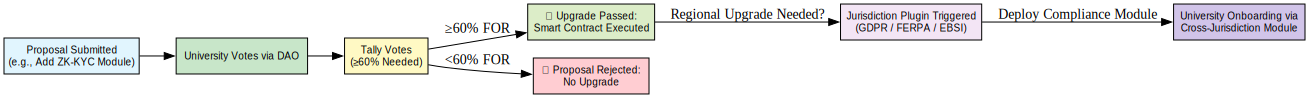

In [34]:
from graphviz import Digraph

g = Digraph("EduTrust DAO Governance Flow", format='png')
g.attr(rankdir='LR', size='20,6')
g.attr('node', shape='box', style='filled', fontname='Arial', fontsize='10')

# Governance Nodes
g.node("A", " Proposal Submitted\n(e.g., Add ZK-KYC Module)", fillcolor="#e1f5fe")
g.node("B", " University Votes via DAO", fillcolor="#c8e6c9")
g.node("C", " Tally Votes\n(≥60% Needed)", fillcolor="#fff9c4")
g.node("D1", "✅ Upgrade Passed:\nSmart Contract Executed", fillcolor="#dcedc8")
g.node("D2", "❌ Proposal Rejected:\nNo Upgrade", fillcolor="#ffcdd2")

# Interoperability Add-On
g.node("E", " Jurisdiction Plugin Triggered\n(GDPR / FERPA / EBSI)", fillcolor="#f3e5f5")
g.node("F", " University Onboarding via\nCross-Jurisdiction Module", fillcolor="#d1c4e9")

# Flow
g.edge("A", "B")
g.edge("B", "C")
g.edge("C", "D1", label="≥60% FOR")
g.edge("C", "D2", label="<60% FOR")
g.edge("D1", "E", label="Regional Upgrade Needed?")
g.edge("E", "F", label="Deploy Compliance Module")

# Render inline
g


In [33]:
# Sample credential metadata
credential_metadata = {
    "name": "Alice Smith",
    "degree": "MSc Finance",
    "institution": "University of Warwick",
    "graduation_year": 2025,
    "gpa": "Distinction"
}

# Selective disclosure logic
def selective_disclosure(data, fields_to_reveal):
    print("\n Selective Disclosure Activated (ZK Simulation):")
    for field in fields_to_reveal:
        if field in data:
            print(f"- {field}: {data[field]}")
        else:
            print(f"- {field}: Not Available")

# Simulate revealing only 'degree' and 'institution'
zk_fields = ["degree", "institution"]
selective_disclosure(credential_metadata, zk_fields)



 Selective Disclosure Activated (ZK Simulation):
- degree: MSc Finance
- institution: University of Warwick


In [30]:
# Simulated DID Registry and Revocation Registry
did_registry = {
    "did:edutrust:alice123": "ipfs://QmABC123CredentialHash",
    "did:edutrust:bob789": "ipfs://QmXYZ987RevokedHash"
}

revocation_registry = {
    "ipfs://QmABC123CredentialHash": False,  # Valid
    "ipfs://QmXYZ987RevokedHash": True       # Revoked
}

def verify_credential(did):
    print(f"\n Verifying Credential for {did} ")
    
    # Step 1: Resolve DID to Credential URI
    ipfs_link = did_registry.get(did)
    if not ipfs_link:
        print("❌ DID not found in registry.")
        return
    
    print(f"IPFS Link: {ipfs_link}")
    
    # Step 2: Check revocation status
    is_revoked = revocation_registry.get(ipfs_link, True)
    if is_revoked:
        print("❌ Credential Status: Revoked")
    else:
        print(" Credential Status: Valid")

# Run simulation for two users
verify_credential("did:edutrust:alice123")
verify_credential("did:edutrust:bob789")



 Verifying Credential for did:edutrust:alice123 
IPFS Link: ipfs://QmABC123CredentialHash
 Credential Status: Valid

 Verifying Credential for did:edutrust:bob789 
IPFS Link: ipfs://QmXYZ987RevokedHash
❌ Credential Status: Revoked


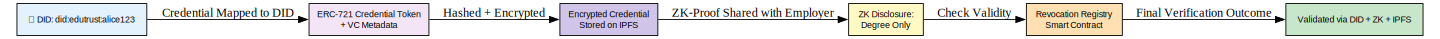

In [36]:
from graphviz import Digraph

# Initialize graph
g = Digraph("Privacy Layering", format='png')
g.attr(rankdir='LR', size='20,8')
g.attr('node', shape='box', style='filled', fontname='Arial', fontsize='10')

# Layer 1 – DID Assignment
g.node("A", "🎓 DID: did:edutrust:alice123", fillcolor="#e3f2fd")

# Layer 2 – VC Credential Creation
g.node("B", " ERC-721 Credential Token\n+ VC Metadata", fillcolor="#f3e5f5")

# Layer 3 – Encryption & Storage
g.node("C", " Encrypted Credential\nStored on IPFS", fillcolor="#d1c4e9")

# Layer 4 – Selective ZK Disclosure
g.node("D", " ZK Disclosure:\nDegree Only", fillcolor="#fff9c4")

# Layer 5 – Revocation Check
g.node("E", " Revocation Registry\nSmart Contract", fillcolor="#ffe0b2")

# Layer 6 – Privacy-Protected Validation
g.node("F", " Validated via DID + ZK + IPFS", fillcolor="#c8e6c9")

# Edges
g.edge("A", "B", label="Credential Mapped to DID")
g.edge("B", "C", label="Hashed + Encrypted")
g.edge("C", "D", label="ZK-Proof Shared with Employer")
g.edge("D", "E", label="Check Validity")
g.edge("E", "F", label="Final Verification Outcome")

# Display inline (no file saving)
display(g)

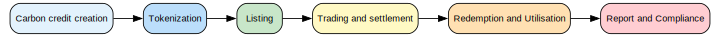

In [37]:
from graphviz import Digraph

# Create a new directed graph
g = Digraph("Carbon Credit Flow", format='png')
g.attr(rankdir='LR', size='10,5')
g.attr('node', shape='box', style='rounded,filled', fontname='Arial', fontsize='11')

# Node Styles
styles = {
    "Carbon credit creation": "#e3f2fd",
    "Tokenization": "#bbdefb",
    "Listing": "#c8e6c9",
    "Trading and settlement": "#fff9c4",
    "Redemption and Utilisation": "#ffe0b2",
    "Report and Compliance": "#ffcdd2"
}

# Add nodes
for step, color in styles.items():
    g.node(step, step, fillcolor=color)

# Add directional edges
steps = list(styles.keys())
for i in range(len(steps) - 1):
    g.edge(steps[i], steps[i + 1])

# Display inline in Jupyter
g.render('carbon_credit_flow', view=False)
display(g)
